In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
%matplotlib inline

In [2]:
df = pd.read_csv('data_train.csv')
df

,Unnamed: 0,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,valence,music_genre
0,0,27.0,0.00468,0.652,0.941,1,-5.201,1,0.0748,0.759,"Jazz, Blues or Electronic"
1,1,31.0,0.01270,0.622,0.890,5,-7.043,1,0.0300,0.531,"Jazz, Blues or Electronic"
2,2,28.0,0.00306,0.620,0.755,11,-4.617,0,0.0345,0.333,"Jazz, Blues or Electronic"
3,3,34.0,0.02540,0.774,0.700,4,-4.498,0,0.2390,0.270,"Jazz, Blues or Electronic"
4,4,32.0,0.00465,0.638,0.587,9,-6.266,0,0.0413,0.323,"Jazz, Blues or Electronic"
...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,59.0,0.03340,0.913,0.574,4,-7.022,0,0.2980,0.330,Rap or Hip-Hop
49996,49996,72.0,0.15700,0.709,0.362,2,-9.814,0,0.0550,0.113,Rap or Hip-Hop
49997,49997,51.0,0.00597,0.693,0.763,5,-5.443,0,0.1460,0.395,Rap or Hip-Hop
49998,49998,65.0,0.08310,0.782,0.472,10,-5.016,1,0.0441,0.354,Rap or Hip-Hop


In [3]:
df['music_genre'].value_counts()

Jazz, Blues or Electronic       15000
Rock, Alternative or Country    15000
Rap or Hip-Hop                  10000
Anime                            5000
Classical                        5000
Name: music_genre, dtype: int64

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df

,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,valence,music_genre
0,27.0,0.00468,0.652,0.941,1,-5.201,1,0.0748,0.759,"Jazz, Blues or Electronic"
1,31.0,0.01270,0.622,0.890,5,-7.043,1,0.0300,0.531,"Jazz, Blues or Electronic"
2,28.0,0.00306,0.620,0.755,11,-4.617,0,0.0345,0.333,"Jazz, Blues or Electronic"
3,34.0,0.02540,0.774,0.700,4,-4.498,0,0.2390,0.270,"Jazz, Blues or Electronic"
4,32.0,0.00465,0.638,0.587,9,-6.266,0,0.0413,0.323,"Jazz, Blues or Electronic"
...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,0.574,4,-7.022,0,0.2980,0.330,Rap or Hip-Hop
49996,72.0,0.15700,0.709,0.362,2,-9.814,0,0.0550,0.113,Rap or Hip-Hop
49997,51.0,0.00597,0.693,0.763,5,-5.443,0,0.1460,0.395,Rap or Hip-Hop
49998,65.0,0.08310,0.782,0.472,10,-5.016,1,0.0441,0.354,Rap or Hip-Hop


In [5]:
df.music_genre.unique()

array(['Jazz, Blues or Electronic', 'Anime',
       'Rock, Alternative or Country', 'Rap or Hip-Hop', 'Classical'],
      dtype=object)

In [6]:
type_music = {'Jazz, Blues or Electronic': 0, 'Anime':1, 
    'Rock, Alternative or Country':2 , 'Rap or Hip-Hop':3, 'Classical':4}
df.music_genre = df.music_genre.map(type_music)

In [7]:
df.music_genre.value_counts()

0    15000
2    15000
3    10000
1     5000
4     5000
Name: music_genre, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    50000 non-null  float64
 1   acousticness  50000 non-null  float64
 2   danceability  50000 non-null  float64
 3   energy        50000 non-null  float64
 4   key           50000 non-null  int64  
 5   loudness      50000 non-null  float64
 6   mode          50000 non-null  int64  
 7   speechiness   50000 non-null  float64
 8   valence       50000 non-null  float64
 9   music_genre   50000 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 3.8 MB


In [9]:
# # Tách cột thuộc tính quyết định ra 1 cột riêng
label = df.music_genre
df = df.drop('music_genre', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3,random_state=10)

# KNN

In [11]:
# Thực hiện thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import classification_report
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
start_knn = time.time()
knn_scores =  []

for i in range (1,12):
    knc = KNeighborsClassifier(i)
    knn_pred = knc.fit(X_train, y_train).predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test, knn_pred))
    max_knn_score = max (knn_scores)
knn_score_ind = [i for i, v in enumerate(knn_scores) if v == max_knn_score]
end_knn =time.time()
times_knn = timedelta(seconds=round(end_knn - start_knn,4)).total_seconds()
print('Highest Accuracy Score : {}% with k = {}'.format(max_knn_score*100, list(map(lambda x: x + 1, knn_score_ind))))
print ('Time', times_knn)
knn_score = round(max_knn_score*100,2)
accuracies_max_knn = knn_score
print("Accuracy", accuracies_max_knn,"%")
print("Report", metrics.classification_report(y_test, knn_pred))

Highest Accuracy Score : 63.76666666666667% with k = [11]
Time 15.155
Accuracy 63.77 %
Report               precision    recall  f1-score   support

           0       0.65      0.67      0.66      4483
           1       0.73      0.55      0.63      1472
           2       0.57      0.62      0.59      4509
           3       0.62      0.62      0.62      3004
           4       0.80      0.72      0.76      1532

    accuracy                           0.64     15000
   macro avg       0.68      0.64      0.65     15000
weighted avg       0.64      0.64      0.64     15000



Text(0.5, 1.0, 'K-Nearest Neighbors Accuracy Score : 63.77%')

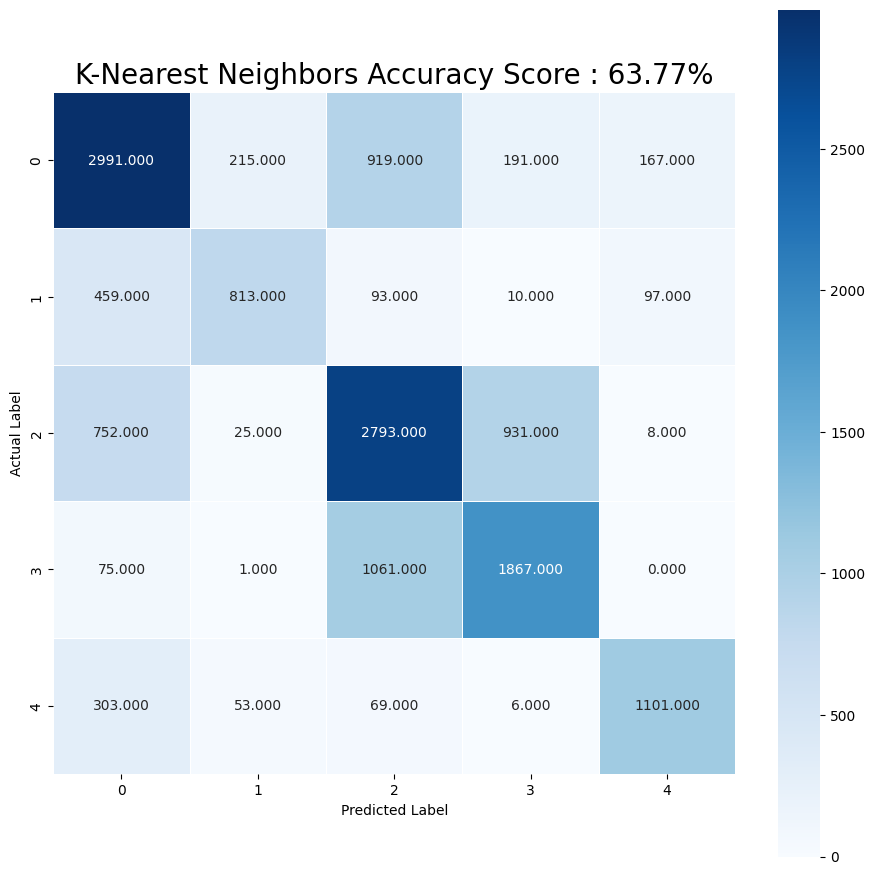

In [12]:
# Tiếp tục thực hiện thuật toán KNN
# Vẽ ma trận nhầm lẫn
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(11,11))
ax = sns.heatmap(knn_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Blues')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'K-Nearest Neighbors Accuracy Score : {0}%'.format(knn_score)
plt.title(title, size = 20)

# Support Vector Machine (SVM)

In [13]:
from sklearn import svm
# Thực hiện thuật toán Support Vector Machine
SVM_model = svm.SVC(kernel='linear')
start_svm =time.time()
svm_pred = SVM_model.fit(X_train, y_train).predict(X_test)
end_svm= time.time()
times_svm = timedelta(seconds=round(end_svm-start_svm,4)).total_seconds()
print ("time", times_svm)

svm_score = round(metrics.accuracy_score(y_test, svm_pred)*100,2)
accuracy_svm = svm_score
print("Accuracy", accuracy_svm,"%")
print("Report", metrics.classification_report(y_test, svm_pred))

time 174.2093
Accuracy 71.65 %
Report               precision    recall  f1-score   support

           0       0.67      0.70      0.69      4483
           1       0.72      0.50      0.59      1472
           2       0.68      0.73      0.70      4509
           3       0.81      0.78      0.80      3004
           4       0.79      0.81      0.80      1532

    accuracy                           0.72     15000
   macro avg       0.73      0.70      0.71     15000
weighted avg       0.72      0.72      0.72     15000



Text(0.5, 1.0, 'Support Vector Machine Accuracy Score : 71.65%')

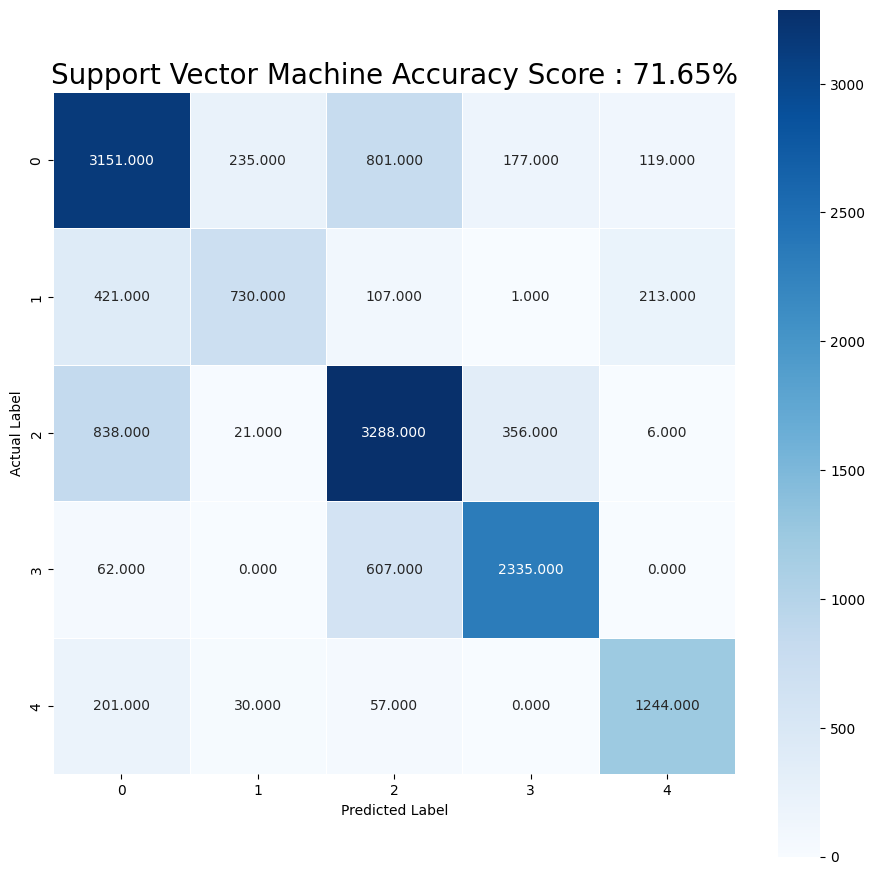

In [14]:
# Tiếp tục thực hiện thuật toán SVM
# Vẽ ma trận nhầm lẫn
svm_cm = metrics.confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(11,11))
ax = sns.heatmap(svm_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Blues')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Support Vector Machine Accuracy Score : {0}%'.format(svm_score)
plt.title(title, size =20)

# Random Forest

In [15]:
# Thực hiện thuật toán Ramdom Forest
rfc = RandomForestClassifier(criterion="gini", random_state=0)
start_rf =time.time()
rf_pred = rfc.fit(X_train, y_train).predict(X_test)
end_rf= time.time()
times_rf = timedelta(seconds=round(end_rf-start_rf,4)).total_seconds()
print ("time", times_rf)

rf_score = round(metrics.accuracy_score(y_test, rf_pred)*100,2)
accuracy_rf = rf_score
print("Accuracy", accuracy_rf,"%")
print("Report", metrics.classification_report(y_test, rf_pred))

time 13.7701
Accuracy 76.9 %
Report               precision    recall  f1-score   support

           0       0.74      0.74      0.74      4483
           1       0.79      0.64      0.71      1472
           2       0.73      0.77      0.75      4509
           3       0.83      0.85      0.84      3004
           4       0.85      0.81      0.83      1532

    accuracy                           0.77     15000
   macro avg       0.79      0.76      0.77     15000
weighted avg       0.77      0.77      0.77     15000



Text(0.5, 1.0, 'Random Forest Accuracy Score : 76.9%')

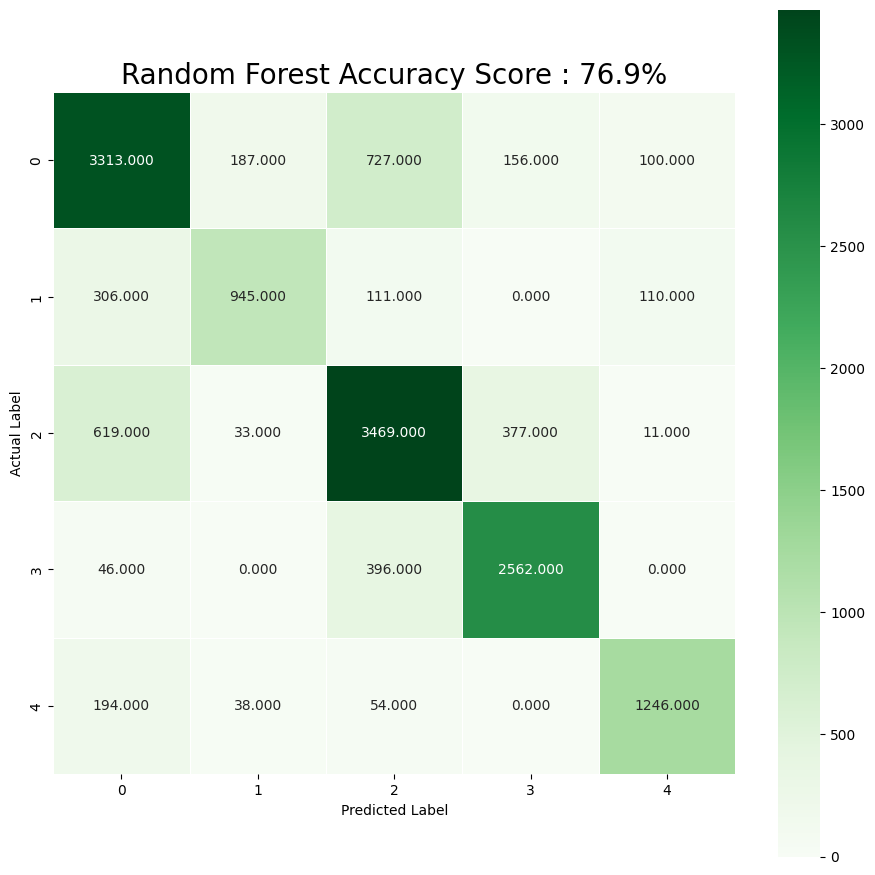

In [16]:
# Vẽ ma trận nhầm lẫn cho mô hình thuật toán Random Forest
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(11,11))
ax =sns.heatmap(rf_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Greens')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Random Forest Accuracy Score : {0}%'.format(rf_score)
plt.title(title, size =20)

# Decision Trees

In [17]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

start_cart = time.time()
cart_pred = clf1.fit(X_train, y_train).predict(X_test)
end_cart = time.time()
times_tree_cart = timedelta(seconds=round(end_cart - start_cart,4)).total_seconds()
print("Time decision tree (CART)",times_tree_cart)
cart_score = round(metrics.accuracy_score(y_test, cart_pred)*100,2)
accuracy_tree_cart = cart_score
print("Accuracy",accuracy_tree_cart)
print("Report",metrics.classification_report(y_test,cart_pred))

Time decision tree (CART) 0.514
Accuracy 67.45
Report               precision    recall  f1-score   support

           0       0.64      0.63      0.63      4483
           1       0.58      0.62      0.60      1472
           2       0.65      0.65      0.65      4509
           3       0.78      0.78      0.78      3004
           4       0.75      0.74      0.74      1532

    accuracy                           0.67     15000
   macro avg       0.68      0.68      0.68     15000
weighted avg       0.68      0.67      0.67     15000



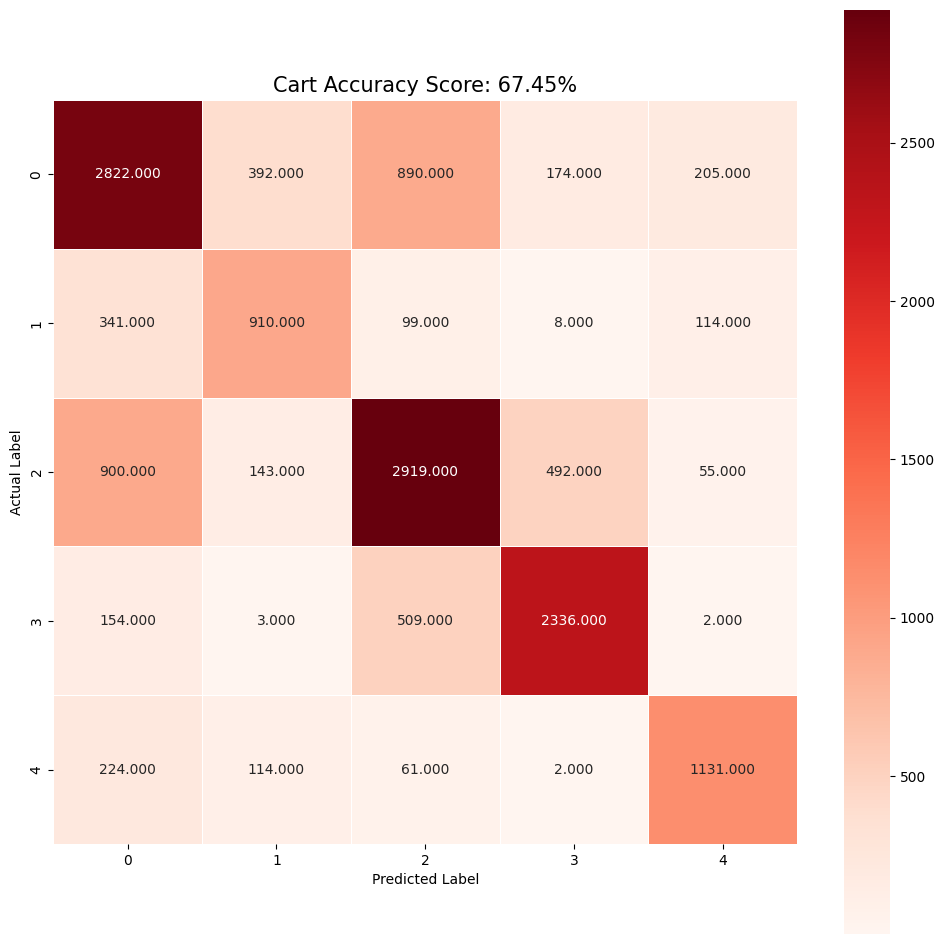

In [18]:
# Vẽ ma trận nhầm lẫn cho thuật toán Decision Tree (CART)
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
ax=sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Cart Accuracy Score: {0}%'.format(cart_score)
plt.title(title,size=15)
plt.show()

# Naive Bayes 

In [20]:
# Thực hiện thuật toán Naive Bayes 
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
start_nv = time.time()
nv_pred = nv.fit(X_train, y_train).predict(X_test)
end_nv = time.time()
times_nv = timedelta(seconds=round(end_nv - start_nv,4)).total_seconds()
print("Time Naive Bayes",times_nv)
nv_score = round(metrics.accuracy_score(y_test, nv_pred)*100,2)
accuracy_nv = nv_score
print("Accuracy",accuracy_nv)
print("Report",metrics.classification_report(y_test,nv_pred))

Time Naive Bayes 0.036
Accuracy 67.51
Report               precision    recall  f1-score   support

           0       0.70      0.55      0.61      4483
           1       0.65      0.45      0.53      1472
           2       0.63      0.75      0.69      4509
           3       0.78      0.76      0.77      3004
           4       0.61      0.87      0.72      1532

    accuracy                           0.68     15000
   macro avg       0.68      0.68      0.66     15000
weighted avg       0.68      0.68      0.67     15000



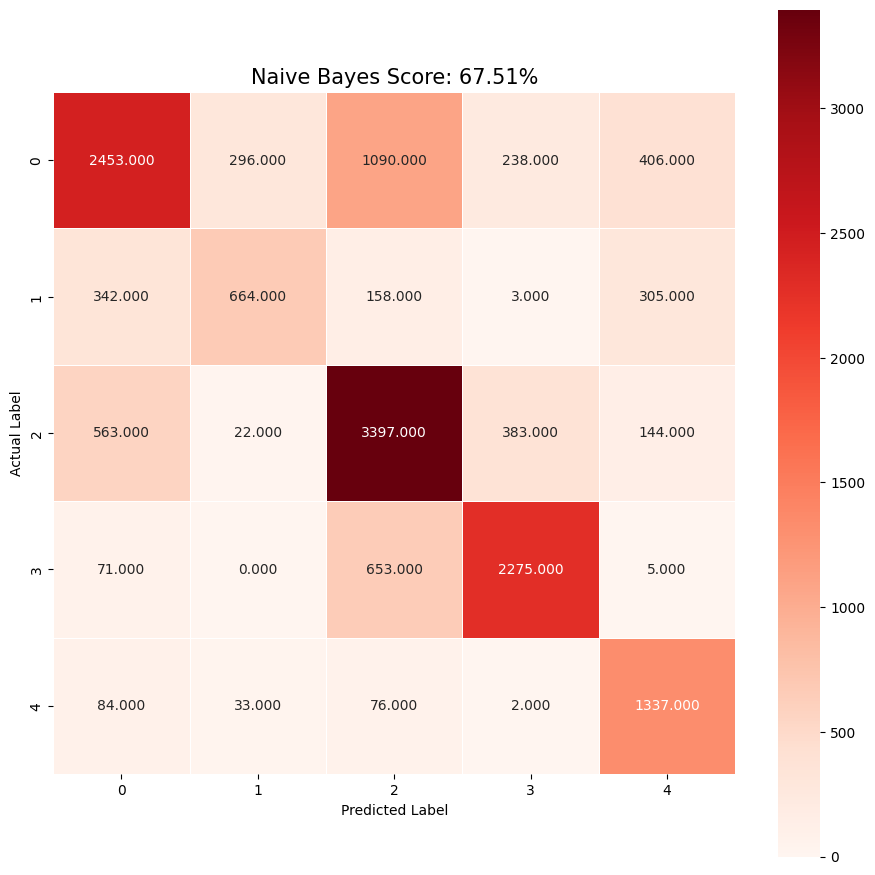

In [21]:
# Vẽ ma trận nhầm lẫn cho thuật toán Naive Bayes
nv_cm = metrics.confusion_matrix(y_test, nv_pred)
plt.figure(figsize=(11,11))
ax=sns.heatmap(nv_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Naive Bayes Score: {0}%'.format(nv_score)
plt.title(title,size=15)
plt.show()

# Compare

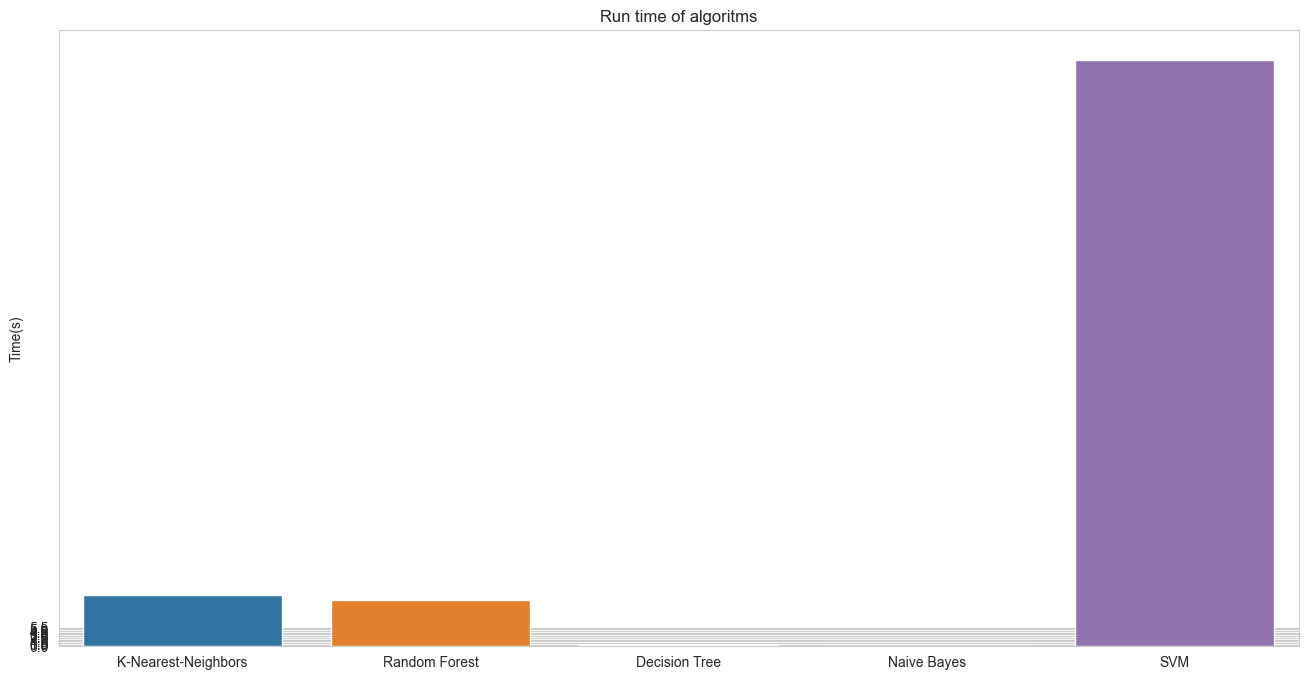

In [22]:
colors = ['blue', 'green', 'red', 'bwr', 'purple']
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,6,0.5))
plt.ylabel('Time(s)')
plt.title('Run time of algoritms')
sns.barplot(x=list(['K-Nearest-Neighbors','Random Forest','Decision Tree','Naive Bayes','SVM']), 
            y= list([times_knn, times_rf, times_tree_cart, times_nv, times_svm]))
plt.show()

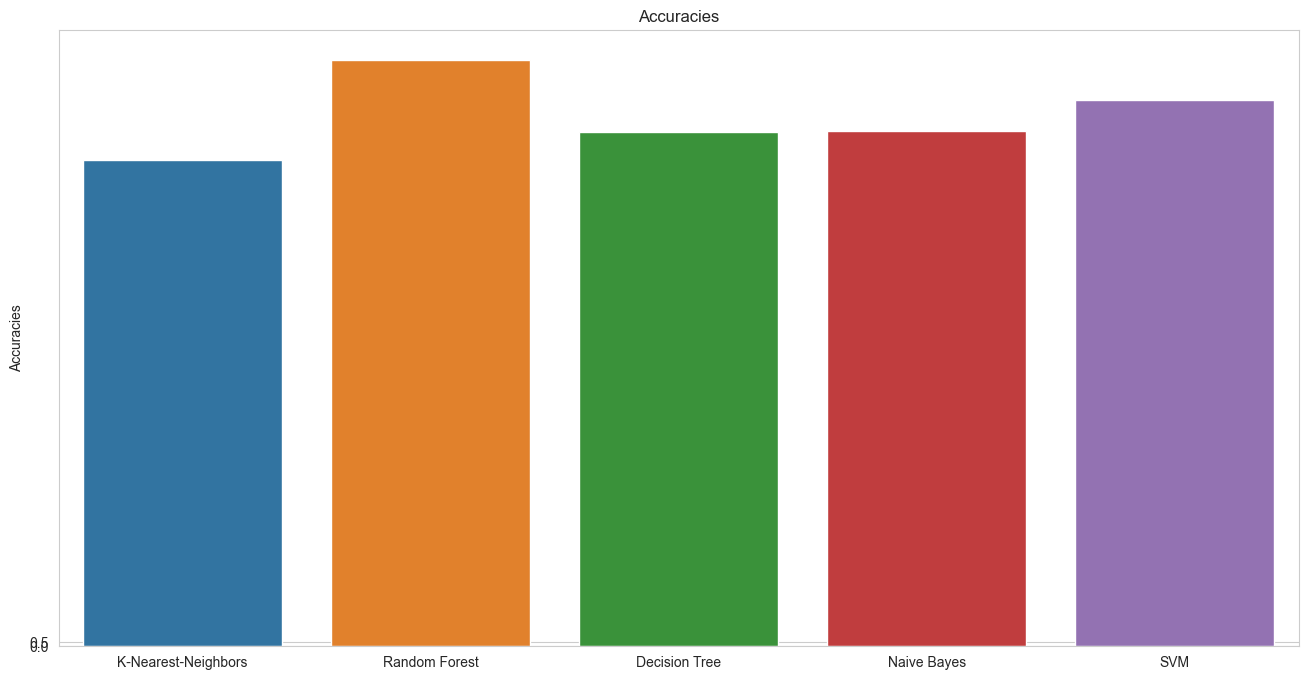

In [23]:
# colors = ['blue', 'green', 'red', 'bwr', 'purple']
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1,0.5))
plt.ylabel('Accuracies')
plt.title('Accuracies')
sns.barplot(x=list(['K-Nearest-Neighbors','Random Forest','Decision Tree','Naive Bayes', 'SVM']), 
            y= list([accuracies_max_knn, accuracy_rf, accuracy_tree_cart, accuracy_nv, accuracy_svm]))
plt.show()

In [24]:
results = pd.DataFrame({
    'Model': ['K-Nearest-Neighbors', 'Random Forest', 'Decision Tree (CART)','Naive Bayes',
              'Support Vector Machine'],
    'Score': [ accuracies_max_knn, accuracy_rf,accuracy_tree_cart, accuracy_nv, accuracy_svm]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
Random Forest,76.90
Support Vector Machine,71.65
Naive Bayes,67.51
Decision Tree (CART),67.45
K-Nearest-Neighbors,63.77


In [25]:
#Tìm thuộc tính có độ tin cậy cao
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=df.columns).sort_values(ascending=False)
feature_imp

popularity      0.278027
speechiness     0.148149
loudness        0.126475
danceability    0.122946
energy          0.098648
acousticness    0.097812
valence         0.078567
key             0.035324
mode            0.014051
dtype: float64

In [26]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [27]:
selected_feat = X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [28]:
print(selected_feat)

Index(['popularity', 'danceability', 'loudness', 'speechiness'], dtype='object')


In [29]:
df2 = pd.read_csv('data_train.csv')
df2

,Unnamed: 0,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,valence,music_genre
0,0,27.0,0.00468,0.652,0.941,1,-5.201,1,0.0748,0.759,"Jazz, Blues or Electronic"
1,1,31.0,0.01270,0.622,0.890,5,-7.043,1,0.0300,0.531,"Jazz, Blues or Electronic"
2,2,28.0,0.00306,0.620,0.755,11,-4.617,0,0.0345,0.333,"Jazz, Blues or Electronic"
3,3,34.0,0.02540,0.774,0.700,4,-4.498,0,0.2390,0.270,"Jazz, Blues or Electronic"
4,4,32.0,0.00465,0.638,0.587,9,-6.266,0,0.0413,0.323,"Jazz, Blues or Electronic"
...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,59.0,0.03340,0.913,0.574,4,-7.022,0,0.2980,0.330,Rap or Hip-Hop
49996,49996,72.0,0.15700,0.709,0.362,2,-9.814,0,0.0550,0.113,Rap or Hip-Hop
49997,49997,51.0,0.00597,0.693,0.763,5,-5.443,0,0.1460,0.395,Rap or Hip-Hop
49998,49998,65.0,0.08310,0.782,0.472,10,-5.016,1,0.0441,0.354,Rap or Hip-Hop


In [30]:
df2.music_genre

0        Jazz, Blues or Electronic
1        Jazz, Blues or Electronic
2        Jazz, Blues or Electronic
3        Jazz, Blues or Electronic
4        Jazz, Blues or Electronic
                   ...            
49995               Rap or Hip-Hop
49996               Rap or Hip-Hop
49997               Rap or Hip-Hop
49998               Rap or Hip-Hop
49999               Rap or Hip-Hop
Name: music_genre, Length: 50000, dtype: object

In [31]:
type_music_2 = {'Jazz, Blues or Electronic': 0, 'Anime':1, 'Rock, Alternative or Country':2 , 'Rap or Hip-Hop':3, 'Classical':4}
df2.music_genre = df2.music_genre.map(type_music_2)

In [32]:
df2

,Unnamed: 0,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,valence,music_genre
0,0,27.0,0.00468,0.652,0.941,1,-5.201,1,0.0748,0.759,0
1,1,31.0,0.01270,0.622,0.890,5,-7.043,1,0.0300,0.531,0
2,2,28.0,0.00306,0.620,0.755,11,-4.617,0,0.0345,0.333,0
3,3,34.0,0.02540,0.774,0.700,4,-4.498,0,0.2390,0.270,0
4,4,32.0,0.00465,0.638,0.587,9,-6.266,0,0.0413,0.323,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,59.0,0.03340,0.913,0.574,4,-7.022,0,0.2980,0.330,3
49996,49996,72.0,0.15700,0.709,0.362,2,-9.814,0,0.0550,0.113,3
49997,49997,51.0,0.00597,0.693,0.763,5,-5.443,0,0.1460,0.395,3
49998,49998,65.0,0.08310,0.782,0.472,10,-5.016,1,0.0441,0.354,3


In [33]:
df2.to_csv("data_predict.csv")